<ipython-input-3-06ed5650ceea>:53: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


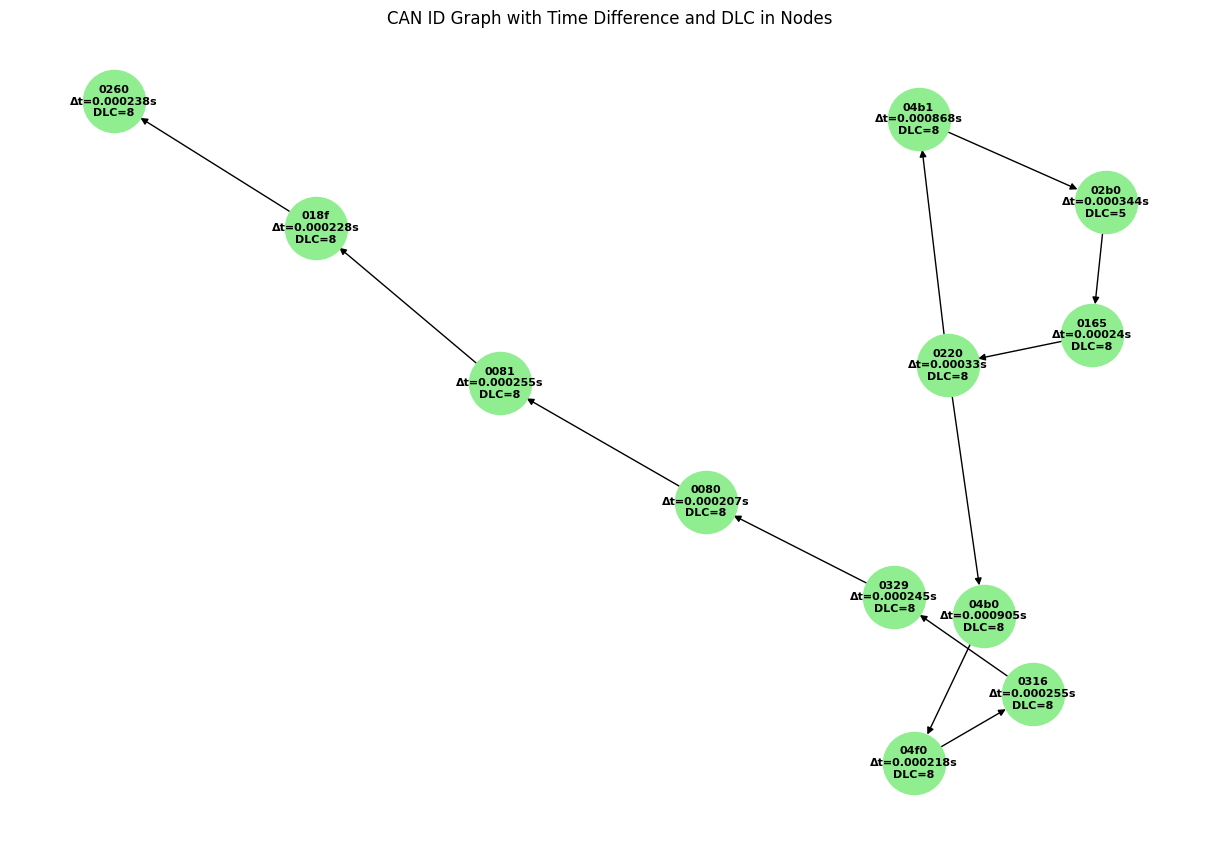

Graph Nodes (with attributes):
('0220', {'time_diff': 0.00033, 'dlc': 8})
('04b1', {'time_diff': 0.000868, 'dlc': 8})
('02b0', {'time_diff': 0.000344, 'dlc': 5})
('0165', {'time_diff': 0.00024, 'dlc': 8})
('04b0', {'time_diff': 0.000905, 'dlc': 8})
('04f0', {'time_diff': 0.000218, 'dlc': 8})
('0316', {'time_diff': 0.000255, 'dlc': 8})
('0329', {'time_diff': 0.000245, 'dlc': 8})
('0080', {'time_diff': 0.000207, 'dlc': 8})
('0081', {'time_diff': 0.000255, 'dlc': 8})
('018f', {'time_diff': 0.000228, 'dlc': 8})
('0260', {'time_diff': 0.000238, 'dlc': 8})

Graph Edges:
('0220', '04b1')
('0220', '04b0')
('04b1', '02b0')
('02b0', '0165')
('0165', '0220')
('04b0', '04f0')
('04f0', '0316')
('0316', '0329')
('0329', '0080')
('0080', '0081')
('0081', '018f')
('018f', '0260')


In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Step 1: Read the CAN log file
with open('/content/drive/MyDrive/abc.txt', 'r') as file:
    lines = file.readlines()

# Step 2: Extract (timestamp, msg_id, dlc) from each line
messages = []
for line in lines:
    parts = line.strip().split()
    if len(parts) < 10:
        continue
    timestamp = float(parts[1])
    msg_id = parts[3]
    dlc_index = parts.index('DLC:')
    dlc = int(parts[dlc_index + 1])
    messages.append((timestamp, msg_id, dlc))

# Step 3: Sort the messages based on timestamp
messages.sort(key=lambda x: x[0])

# Step 4: Build a directed graph with DLC & time_diff stored in **nodes**
graph = nx.DiGraph()
for i in range(len(messages) - 1):
    current_id = messages[i][1]
    next_id = messages[i + 1][1]
    time_diff = round(messages[i + 1][0] - messages[i][0], 6)
    dlc = messages[i + 1][2]

    # Add current node if not already
    if current_id not in graph.nodes:
        graph.add_node(current_id, time_diff=0.0, dlc=0)  # first message, dummy values

    # Add next node with correct info
    graph.add_node(next_id, time_diff=time_diff, dlc=dlc)

    # Add edge between current and next
    graph.add_edge(current_id, next_id)

# Step 5: Prepare node labels
node_labels = {
    node: f"{node}\nΔt={attrs['time_diff']}s\nDLC={attrs['dlc']}"
    for node, attrs in graph.nodes(data=True)
}

# Step 6: Draw the graph
pos = nx.spring_layout(graph, seed=42)
plt.figure(figsize=(12, 8))
nx.draw(graph, pos, with_labels=True, labels=node_labels, node_color='lightgreen', node_size=2000, font_size=8, font_weight='bold', arrows=True)
plt.title("CAN ID Graph with Time Difference and DLC in Nodes")
plt.axis('off')
plt.tight_layout()
plt.show()

# Step 7: Return the list of nodes and edges
graph_nodes = list(graph.nodes(data=True))
graph_edges = list(graph.edges())

print("Graph Nodes (with attributes):")
for node in graph_nodes:
    print(node)

print("\nGraph Edges:")
for edge in graph_edges:
    print(edge)

